In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('~/Downloads/tmp/MRK421.csv')

In [6]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
p = df.iloc[:, 3]
q = df.iloc[:, 4]

In [7]:
mu = y.mean()
T = x.max() - x.min()
N = len(x)
P_of_nu = np.array([])

In [8]:
for i in range(1, int(N/2 + 1)):
    P_of_nu = np.append(P_of_nu, ((2*T) / (mu ** 2 * N**2)) * (np.sum(y * np.cos(2 * np.pi * i * x / T)) ** 2 + np.sum(y * np.cos(2 * np.pi * i * x / T)) ** 2))

In [9]:
nu = np.array([i / T for i in range(1, int(N/2 + 1))])

In [10]:
P_stat = ((2*T) / (mu ** 2 * N**2)) * np.sum(q - p)**2 / N

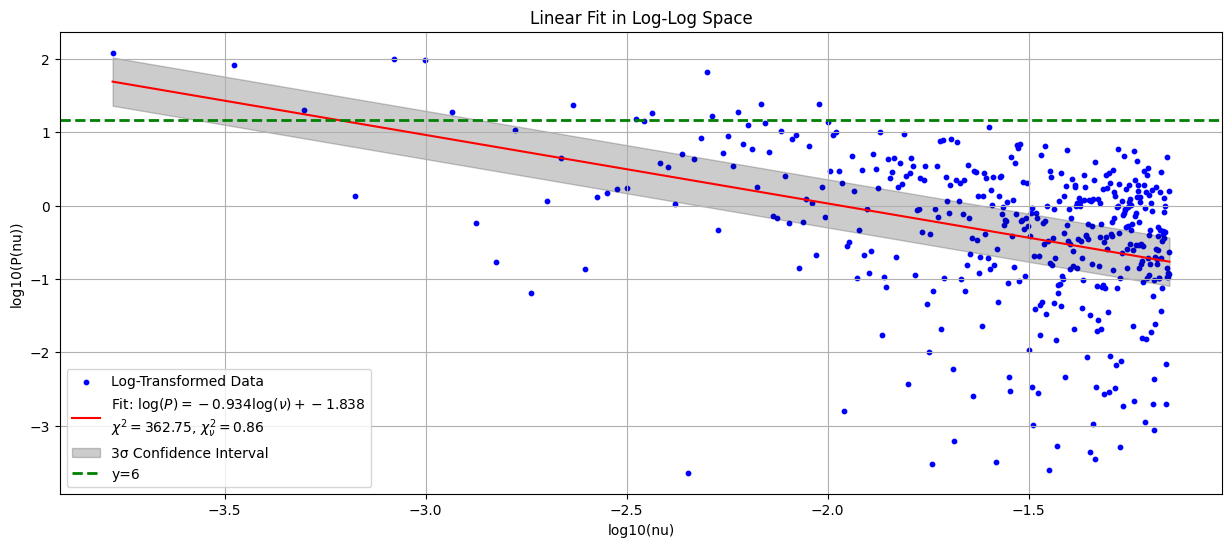

Fitted Parameters:
A = 1.451e-02
n = -0.934
R-squared = 0.146
Chi-Square: 362.750
Reduced Chi-Square: 0.858


In [24]:
# Log-transform the data
log_nu = np.log10(nu)
log_P_of_nu = np.log10(P_of_nu)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_nu, log_P_of_nu)

# Generate fitted line in log-log space
log_P_fit = slope * log_nu + intercept


# Calculate chi-square
chi_square = np.sum(((log_P_of_nu - log_P_fit) ** 2) / np.std(log_P_of_nu)**2)

# Calculate degrees of freedom
degrees_of_freedom = len(log_P_of_nu) - 2

# Calculate reduced chi-square
reduced_chi_square = chi_square / degrees_of_freedom

# Plot the data and fit
plt.figure(figsize=(15, 6))
plt.scatter(log_nu, log_P_of_nu, color="blue", label="Log-Transformed Data", s=10)
plt.plot(log_nu, log_P_fit, color="red", 
            label=f"Fit: $\\log(P) = {slope:.3f}\\log(\\nu) + {intercept:.3f}$\n"
                  f"$\\chi^2 = {chi_square:.2f}$, $\\chi^2_\\nu = {reduced_chi_square:.2f}$")

# Compute 2-sigma confidence intervals
num_sigma = 3
sigma_fit = num_sigma * std_err
log_P_upper = log_P_fit + sigma_fit
log_P_lower = log_P_fit - sigma_fit

# Plot confidence band
plt.fill_between(log_nu, log_P_lower, log_P_upper, color='black', alpha=0.2, label=f"{num_sigma}σ Confidence Interval")

plt.axhline(y=P_stat, color='green', linestyle='--', linewidth=2, label='y=6')
plt.xlabel("log10(nu)")
plt.ylabel("log10(P(nu))")
plt.title("Linear Fit in Log-Log Space")
plt.legend()
plt.grid()
plt.show()

# Print results
A_fit = 10**intercept  # Back-transform to get A
print(f"Fitted Parameters:\nA = {A_fit:.3e}\nn = {slope:.3f}\nR-squared = {r_value**2:.3f}")
print(f"Chi-Square: {chi_square:.3f}")
print(f"Reduced Chi-Square: {reduced_chi_square:.3f}")

(1.0295701514861675, 0.10957484977286251)